<a href="https://colab.research.google.com/github/cheung0/Predicting-Air-Quality/blob/main/Air_Quality_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [45]:
from google.colab import files
df = pd.read_csv('/California Air Quality.csv')
# get statistics of csv file
df.describe()

,Site ID,POC,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,CBSA_CODE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE
count,1.280770e+05,128077.000000,128077.000000,128077.000000,128077.0,128077.0,128077.000000,117670.000000,128077.0,128077.000000,128077.000000,128077.000000
mean,6.056698e+07,2.608306,9.179105,34.295596,1.0,100.0,88196.462027,35403.422963,6.0,56.554034,36.360537,-119.744851
std,2.951604e+05,1.446169,11.042799,24.002847,0.0,0.0,170.784958,9764.069356,0.0,29.518146,2.285201,1.987997
min,6.001001e+07,1.000000,-3.100000,0.000000,1.0,100.0,88101.000000,12540.000000,6.0,1.000000,32.578160,-124.203470
25%,6.031000e+07,1.000000,4.300000,18.000000,1.0,100.0,88101.000000,31080.000000,6.0,31.000000,34.144350,-121.493110
50%,6.063101e+07,3.000000,7.100000,30.000000,1.0,100.0,88101.000000,40140.000000,6.0,63.000000,36.595556,-119.773210
75%,6.075000e+07,3.000000,11.200000,47.000000,1.0,100.0,88101.000000,41860.000000,6.0,75.000000,37.972310,-118.162833
max,6.113100e+07,21.000000,685.500000,622.000000,1.0,100.0,88502.000000,49700.000000,6.0,113.000000,41.756130,-115.483070


In [46]:
# clean data
df = df.drop(["Date","Source","Site ID","POC","UNITS","Site Name","DAILY_OBS_COUNT","PERCENT_COMPLETE","AQS_PARAMETER_CODE","AQS_PARAMETER_DESC","CBSA_CODE","CBSA_NAME","STATE_CODE","STATE","COUNTY_CODE","COUNTY","SITE_LATITUDE","SITE_LONGITUDE"
], axis=1)

In [47]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in days_of_week:
    day_data = df[df['DAY_OF_WEEK'] == day]
    aqi_stats = day_data['DAILY_AQI_VALUE'].agg(['min', 'max', 'mean', 'median', 'std'])
    print("AQI statistics for", day)
    print(aqi_stats)

AQI statistics for Monday
min         0.000000
max       448.000000
mean       33.950989
median     29.000000
std        24.130304
Name: DAILY_AQI_VALUE, dtype: float64
AQI statistics for Tuesday
min         0.000000
max       537.000000
mean       32.979031
median     29.000000
std        21.880845
Name: DAILY_AQI_VALUE, dtype: float64
AQI statistics for Wednesday
min         0.000000
max       460.000000
mean       33.493756
median     29.000000
std        22.418016
Name: DAILY_AQI_VALUE, dtype: float64
AQI statistics for Thursday
min         0.000000
max       494.000000
mean       34.176561
median     30.000000
std        22.966824
Name: DAILY_AQI_VALUE, dtype: float64
AQI statistics for Friday
min         0.000000
max       587.000000
mean       35.760220
median     31.000000
std        25.082241
Name: DAILY_AQI_VALUE, dtype: float64
AQI statistics for Saturday
min         0.000000
max       622.000000
mean       35.656402
median     31.000000
std        26.017262
Name: DAILY_AQI_

In [48]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']
weekday_avg = np.mean(df[df['DAY_OF_WEEK'].isin(weekdays)]['DAILY_AQI_VALUE'])
weekend_avg = np.mean(df[df['DAY_OF_WEEK'].isin(weekends)]['DAILY_AQI_VALUE'])
print("Average AQI for weekdays:", weekday_avg)
print("Average AQI for weekends:", weekend_avg)

Average AQI for weekdays: 34.07489232994707
Average AQI for weekends: 34.84247542497149


In [49]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in days_of_week:
    day_data = df[df['DAY_OF_WEEK'] == day]
    pm_stats = day_data['Daily Mean PM2.5 Concentration'].agg(['min', 'max', 'mean', 'median', 'std'])
    print("PM2.5 Concentration statistics for", day)
    print(pm_stats)

PM2.5 Concentration statistics for Monday
min        -2.100000
max       421.900000
mean        9.106896
median      7.000000
std        10.717155
Name: Daily Mean PM2.5 Concentration, dtype: float64
PM2.5 Concentration statistics for Tuesday
min        -2.000000
max       556.700000
mean        8.621458
median      7.000000
std         9.114374
Name: Daily Mean PM2.5 Concentration, dtype: float64
PM2.5 Concentration statistics for Wednesday
min        -2.600000
max       439.700000
mean        8.809092
median      7.000000
std         9.451611
Name: Daily Mean PM2.5 Concentration, dtype: float64
PM2.5 Concentration statistics for Thursday
min        -1.400000
max       491.000000
mean        9.040143
median      7.100000
std        10.019883
Name: Daily Mean PM2.5 Concentration, dtype: float64
PM2.5 Concentration statistics for Friday
min        -1.900000
max       632.000000
mean        9.683768
median      7.500000
std        12.394509
Name: Daily Mean PM2.5 Concentration, dtype: fl

In [50]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']
weekday_avg = np.mean(df[df['DAY_OF_WEEK'].isin(weekdays)]['Daily Mean PM2.5 Concentration'])
weekend_avg = np.mean(df[df['DAY_OF_WEEK'].isin(weekends)]['Daily Mean PM2.5 Concentration'])
print("Average Daily Mean PM2.5 Concentration for weekdays:", weekday_avg)
print("Average Daily Mean PM2.5 Concentration for weekends:", weekend_avg)

Average Daily Mean PM2.5 Concentration for weekdays: 9.053258594426362
Average Daily Mean PM2.5 Concentration for weekends: 9.490938467387172


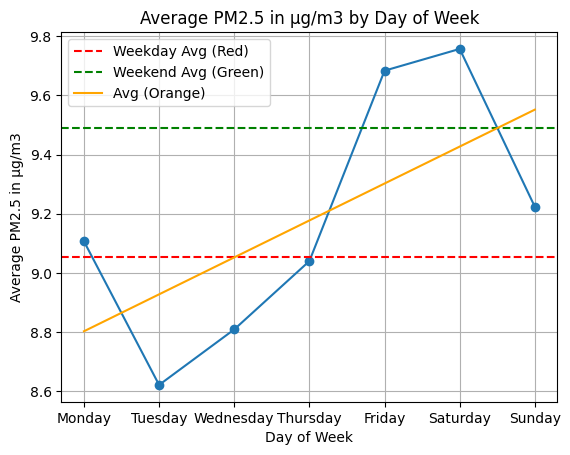

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Group the data by 'DayOfWeek' and calculate the average AQI for each day
avg_aqi_by_day = df.groupby('DAY_OF_WEEK')['Daily Mean PM2.5 Concentration'].mean()

# Define the order of the days of the week for proper sorting on the x-axis
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a line plot
plt.plot(avg_aqi_by_day.reindex(weekday_order), marker='o')

# Calculate the average AQI for weekdays and weekends
avg_weekday_aqi = avg_aqi_by_day[weekday_order[:5]].mean()
avg_weekend_aqi = avg_aqi_by_day[weekday_order[5:]].mean()

# Add horizontal lines for average weekday and weekend AQI
plt.axhline(avg_weekday_aqi, color='r', linestyle='--', label='Weekday Avg (Red)')
plt.axhline(avg_weekend_aqi, color='g', linestyle='--', label='Weekend Avg (Green)')

# Fit a line to the data points
x = np.arange(len(weekday_order))
y = avg_aqi_by_day.reindex(weekday_order)
coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)
plt.plot(x, line(x), color='orange', label='Avg (Orange)')

# Customize the plot
plt.title('Average PM2.5 in μg/m3 by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average PM2.5 in μg/m3')
plt.xticks(range(7), weekday_order)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

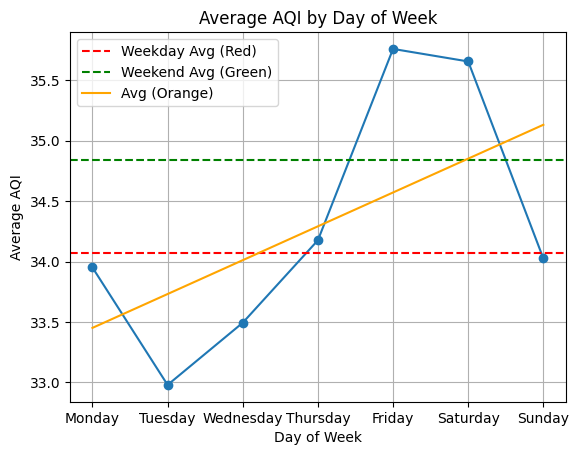

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Group the data by 'DayOfWeek' and calculate the average AQI for each day
avg_aqi_by_day = df.groupby('DAY_OF_WEEK')['DAILY_AQI_VALUE'].mean()

# Define the order of the days of the week for proper sorting on the x-axis
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a line plot
plt.plot(avg_aqi_by_day.reindex(weekday_order), marker='o')

# Calculate the average AQI for weekdays and weekends
avg_weekday_aqi = avg_aqi_by_day[weekday_order[:5]].mean()
avg_weekend_aqi = avg_aqi_by_day[weekday_order[5:]].mean()

# Add horizontal lines for average weekday and weekend AQI
plt.axhline(avg_weekday_aqi, color='r', linestyle='--', label='Weekday Avg (Red)')
plt.axhline(avg_weekend_aqi, color='g', linestyle='--', label='Weekend Avg (Green)')

# Fit a line to the data points
x = np.arange(len(weekday_order))
y = avg_aqi_by_day.reindex(weekday_order)
coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)
plt.plot(x, line(x), color='orange', label='Avg (Orange)')

# Customize the plot
plt.title('Average AQI by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average AQI')
plt.xticks(range(7), weekday_order)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

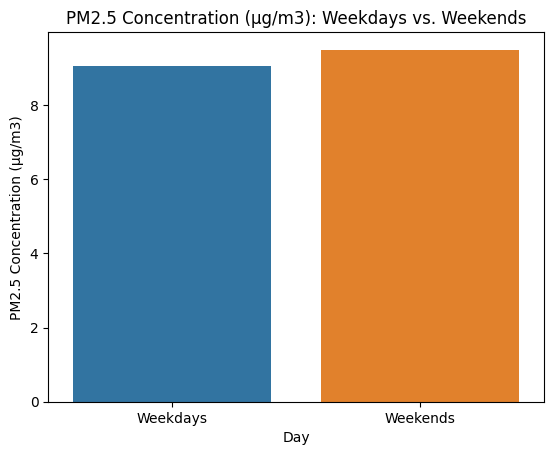

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the average PM2.5 Concentration for weekdays and weekends
data = pd.DataFrame({
    'Day': ['Weekdays', 'Weekends'],
    'PM2.5 Concentration': [9.053258594426362, 9.490938467387172]
})

# Plot the data using a barplot
sns.barplot(x='Day', y='PM2.5 Concentration', data=data)

# Add labels and title to the plot
plt.xlabel('Day')
plt.ylabel('PM2.5 Concentration (μg/m3)')
plt.title('PM2.5 Concentration (μg/m3): Weekdays vs. Weekends')

# Show the plot
plt.show()


In [54]:
# one hot encode day of week
df = pd.get_dummies(df, columns=['DAY_OF_WEEK'])

In [55]:
df

,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,DAY_OF_WEEK_Friday,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday
0,3.7,15,0,0,0,1,0,0,0
1,2.7,11,0,1,0,0,0,0,0
2,3.6,15,0,0,0,0,0,1,0
3,2.7,11,0,0,0,0,0,0,1
4,4.7,20,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
128072,3.8,16,0,0,0,0,0,0,1
128073,6.0,25,0,0,0,0,0,1,0
128074,34.8,99,0,1,0,0,0,0,0
128075,23.2,74,0,0,0,1,0,0,0


In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame called 'df' with columns: Daily Mean PM2.5 Concentration, DAILY_AQI_VALUE,
# DAY_OF_WEEK_Friday, DAY_OF_WEEK_Monday, DAY_OF_WEEK_Saturday, DAY_OF_WEEK_Sunday, DAY_OF_WEEK_Thursday,
# DAY_OF_WEEK_Tuesday, DAY_OF_WEEK_Wednesday

# Split the data into input (X) and target (y) variables
X = df[['Daily Mean PM2.5 Concentration', 'DAY_OF_WEEK_Friday', 'DAY_OF_WEEK_Monday',
        'DAY_OF_WEEK_Saturday', 'DAY_OF_WEEK_Sunday', 'DAY_OF_WEEK_Thursday',
        'DAY_OF_WEEK_Tuesday', 'DAY_OF_WEEK_Wednesday']]
y = df['DAILY_AQI_VALUE']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [84]:
# Assuming you have a sample input data called 'sample_input' with the same column structure as 'df'
sample_input = pd.DataFrame({'Daily Mean PM2.5 Concentration': [6],
                             'DAY_OF_WEEK_Friday': [0],
                             'DAY_OF_WEEK_Monday': [0],
                             'DAY_OF_WEEK_Saturday': [0],
                             'DAY_OF_WEEK_Sunday': [0],
                             'DAY_OF_WEEK_Thursday': [1],
                             'DAY_OF_WEEK_Tuesday': [0],
                             'DAY_OF_WEEK_Wednesday': [0]})

# Extract the day of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week = days_of_week[sample_input[['DAY_OF_WEEK_Monday', 'DAY_OF_WEEK_Tuesday', 'DAY_OF_WEEK_Wednesday', 'DAY_OF_WEEK_Thursday', 'DAY_OF_WEEK_Friday', 'DAY_OF_WEEK_Saturday', 'DAY_OF_WEEK_Sunday']].values.argmax()]

# Extract the daily PM2.5 concentration
pm25_concentration = sample_input['Daily Mean PM2.5 Concentration'].values[0]

# Print the day of the week and the daily PM2.5 concentration
print("Day of the Week:", day_of_week)
print("PM2.5 Concentration:", pm25_concentration)

# Normalize the sample input data
sample_input_scaled = scaler.transform(sample_input)

# Predict the AQI values for the sample input data
predicted = model.predict(sample_input_scaled)
rounded_predicted = np.round(predicted)

# Denormalize the predicted AQI values
#predicted_denormalized = scaler.inverse_transform(predicted)

# Print the denormalized predicted AQI values
print()
print('Predicted AQI:', rounded_predicted[0])

Day of the Week: Thursday
PM2.5 Concentration: 6

Predicted AQI: 28.0


In [85]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the train set
train_predictions = model.predict(X_train_scaled)

# Predict on the test set
test_predictions = model.predict(X_test_scaled)

# Calculate the Mean Squared Error (MSE) on train and test sets
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Calculate the Root Mean Squared Error (RMSE) on train and test sets
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Calculate the R-squared (R2) score on train and test sets
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Print the evaluation metrics
print("Train Set - MSE: {:.2f}, RMSE: {:.2f}, R2 Score: {:.2f}".format(train_mse, train_rmse, train_r2))
print("Test Set - MSE: {:.2f}, RMSE: {:.2f}, R2 Score: {:.2f}".format(test_mse, test_rmse, test_r2))


Train Set - MSE: 122.63, RMSE: 11.07, R2 Score: 0.79
Test Set - MSE: 121.22, RMSE: 11.01, R2 Score: 0.79
